In [1]:
from fastai.vision.all import *
import fastai
import timm
import torch
import pandas as pd
torch.cuda.set_device(1)
import albumentations as A

In [2]:
df = pd.read_csv('dfNew5.csv')

In [3]:
from fastai.vision.all import *
callbacks = [
    ShowGraphCallback(),
    # EarlyStoppingCallback(patience=5),
    SaveModelCallback(fname='efficientnet_base_semisupervised_v5'),
    MixUp(),
    # ReduceLROnPlateau(patience=2)
]

In [4]:
db = DataBlock(blocks = (ImageBlock, RegressionBlock),
             splitter=ColSplitter('Split'),
             get_x = ColReader(0),
             get_y=ColReader(1),
             item_tfms = [Resize(640)], # CropPad(200,200)
             batch_tfms=[*aug_transforms(size=512, min_scale=0.75,do_flip=True,flip_vert=True,
                  max_rotate=2.,max_zoom=1.1, max_warp=0.05,p_affine=0.9, p_lighting=0.8), 
                         Normalize.from_stats(*imagenet_stats)])

In [5]:
dls = db.dataloaders(df,bs=32)

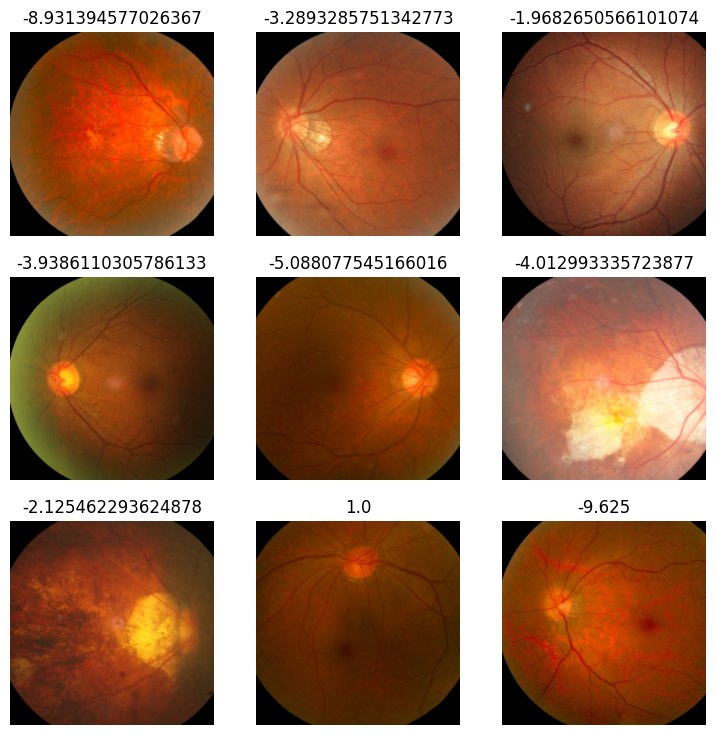

In [6]:
dls.show_batch()

In [7]:
modelo=timm.models.tf_efficientnetv2_m_in21ft1k(num_classes=1,pretrained=True)

In [8]:
learn = Learner(dls,modelo,
            loss_func=MSELossFlat(), metrics=[mae,rmse,mse],
            cbs=callbacks,opt_func=ranger).to_fp16()

In [9]:
learn.load('efficientnetv2_rw_m_640_2')

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


epoch,train_loss,valid_loss,mae,_rmse,mse,time
0,0.757268,0.466564,0.549613,0.683055,0.466564,00:39
1,0.720601,0.555363,0.584769,0.745227,0.555363,00:38
2,0.732107,0.617217,0.614828,0.785632,0.617217,00:39
3,0.719469,0.819673,0.730931,0.905358,0.819673,00:38
4,0.735886,0.836518,0.707741,0.914614,0.836518,00:39
5,0.730362,2.837543,1.469439,1.684501,2.837543,00:39
6,0.698559,0.685813,0.596125,0.828139,0.685813,00:37
7,0.766375,0.674979,0.641978,0.821571,0.674979,00:37
8,0.814880,0.771090,0.670199,0.878117,0.771090,00:39
9,0.712922,0.773948,0.639803,0.879743,0.773948,00:38


Better model found at epoch 0 with valid_loss value: 0.46656447649002075.


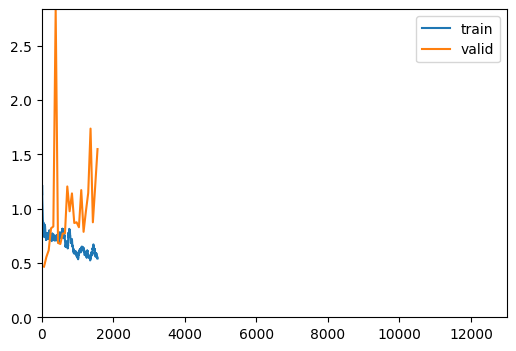

KeyboardInterrupt: 

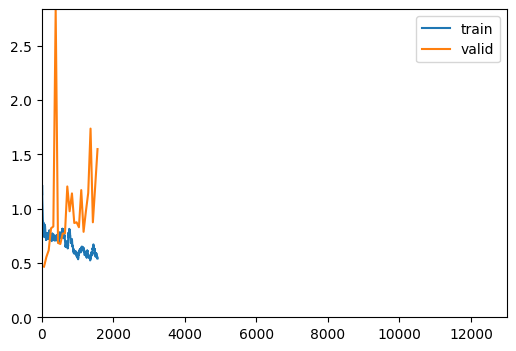

In [10]:
learn.fit_flat_cos(200,1e-3)

In [11]:
learn.load('efficientnet_base_semisupervised_v5')

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [13]:
preds,y=learn.get_preds()

In [14]:
print(mean_absolute_error(preds,y))

0.5496127


In [ ]:
print(mean_squared_error(preds,y))

In [ ]:
# learn1 = vision_learner(dls,convnext_base,pretrained=True)
# learn1.load('convnext_base_semisupervised')
# learn1.export('models/convnext_base_semisupervised.pkl')

In [ ]:
# learn1 = vision_learner(dls,convnext_base,pretrained=True)
# learn1.load('convnext_base_semisupervised_v4')
# learn1.export('models/convnext_base_semisupervised_v4.pkl')

In [18]:
learn1 = Learner(dls,modelo)
learn1.load('efficientnet_base_semisupervised_v5')
learn1.export('models/efficientnetv2_rw_m_640_3.pkl')

/home/joheras/.conda/envs/python38/lib/python3.8/site-packages/fastai/learner.py:58: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


In [19]:
preds,y=learn1.get_preds()

In [20]:
print(mean_squared_error(preds,y))

0.4639345
